# Importing Libraries

In [1]:
# load the libraries
import os
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow import keras
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Importing the data

In [2]:
import zipfile
import os
from google.colab import drive
drive.mount('/content/drive')
file_path1="/content/drive/My Drive/Dataset/DL_Assignment_2"
file_path = "/content/drive/My Drive/Dataset/DL_Assignment_2/dogs-vs-cats-vvsmall.zip"
zip_ref = zipfile.ZipFile(file_path, 'r')
zip_ref.extractall(file_path1)
zip_ref.close()


Mounted at /content/drive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
base_dir = '/content/drive/My Drive/Dataset/DL_Assignment_2/dogs-vs-cats-vvsmall'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')

train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')

validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [4]:
train_cat_names = os.listdir(train_cats_dir)
print(train_cat_names[:10])

train_dog_names = os.listdir(train_dogs_dir)
print(train_dog_names[:10])

validation_cat_names = os.listdir(validation_cats_dir)
print(validation_cat_names[:10])

validation_dog_names = os.listdir(validation_dogs_dir)
print(validation_dog_names[:10])

['cat.2799.jpg', 'cat.28.jpg', 'cat.2800.jpg', 'cat.280.jpg', 'cat.2801.jpg', 'cat.2802.jpg', 'cat.2803.jpg', 'cat.2804.jpg', 'cat.2805.jpg', 'cat.2806.jpg']
['dog.2799.jpg', 'dog.28.jpg', 'dog.280.jpg', 'dog.2800.jpg', 'dog.2801.jpg', 'dog.2802.jpg', 'dog.2803.jpg', 'dog.2804.jpg', 'dog.2805.jpg', 'dog.2807.jpg']
['cat.8507.jpg', 'cat.8502.jpg', 'cat.8508.jpg', 'cat.8504.jpg', 'cat.8501.jpg', 'cat.8505.jpg', 'cat.8500.jpg', 'cat.8503.jpg', 'cat.8509.jpg', 'cat.8506.jpg']
['dog.8500.jpg', 'dog.8502.jpg', 'dog.8501.jpg', 'dog.8503.jpg', 'dog.8504.jpg', 'dog.8505.jpg', 'dog.8507.jpg', 'dog.8508.jpg', 'dog.8506.jpg', 'dog.8509.jpg']


In [5]:
# print out the number of images in the directories
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 3000
total training dog images: 3000
total validation cat images: 900
total validation dog images: 900


# Visualizing Images

In [6]:
# display images from the dataset
nrows = 4
ncols = 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
# pick the first 8 horse pictures
#[print(e) for e in myList]
# for e in myList:
#    print(e)
next_cat_pix = [os.path.join(train_cats_dir, fname) for fname in train_cat_names[pic_index-8:pic_index]]

# pick the first 8 human pictures
next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dog_names[pic_index-8:pic_index]]

# add the horse and human pictures together in a list and plot in
# the specified number of rows and columns
for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [11]:
BATCH_SIZE = 32
IMG_SIZE = 224
# All images will be rescaled by 1./255 and augmented
train_datagen = ImageDataGenerator(brightness_range=[0.5, 1.5],
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)
validation_datagen = ImageDataGenerator(
    rescale=1./255,   # rescale pixel values to [0,1]
)

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        r'/content/drive/My Drive/Dataset/DL_Assignment_2/dogs-vs-cats-vvsmall/train/',  # This is the source directory for training images
        target_size=(IMG_SIZE, IMG_SIZE),  # All images will be resized to 224x224
        batch_size=BATCH_SIZE,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 32 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        r'/content/drive/My Drive/Dataset/DL_Assignment_2/dogs-vs-cats-vvsmall/validation/',  # This is the source directory for training images
        target_size=(IMG_SIZE, IMG_SIZE),  # All images will be resized to  224x224
        batch_size=BATCH_SIZE,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 6000 images belonging to 2 classes.
Found 1800 images belonging to 2 classes.


In [12]:
pip install keras_tuner

# CNN Model 1

In [8]:

# Build the CNN model
model = Sequential([
    Conv2D(9, kernel_size=(9, 9), activation='relu', input_shape=(224, 224, 3)),
    Dropout(0.05),
    MaxPooling2D(pool_size=(9, 9)),
    Flatten(),
    Dropout(0.05),
    Dense(512, activation='relu'),
    Dropout(0.1),
    Dense(1, activation='sigmoid')  # Assuming binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
# Model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 216, 216, 9)         │           2,196 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 216, 216, 9)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 9)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5184)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5184)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       2,654,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,657,429 (10.14 MB)

 Trainable params: 2,657,429 (10.14 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
history=model.fit( train_generator,
                    validation_data = validation_generator,
                    epochs=5
                  )

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 633s 3s/step - accuracy: 0.5328 - loss: 0.6845 - val_accuracy: 0.5883 - val_loss: 0.6592
Epoch 2/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 622s 3s/step - accuracy: 0.6332 - loss: 0.6341 - val_accuracy: 0.7000 - val_loss: 0.5804
Epoch 3/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 622s 3s/step - accuracy: 0.6699 - loss: 0.6096 - val_accuracy: 0.6728 - val_loss: 0.5952
Epoch 4/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 622s 3s/step - accuracy: 0.6837 - loss: 0.5947 - val_accuracy: 0.7389 - val_loss: 0.5395
Epoch 5/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 666s 4s/step - accuracy: 0.6891 - loss: 0.5839 - val_accuracy: 0.7411 - val_loss: 0.5302


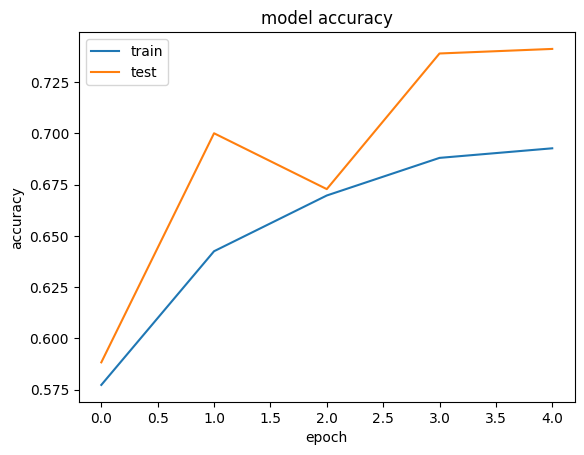

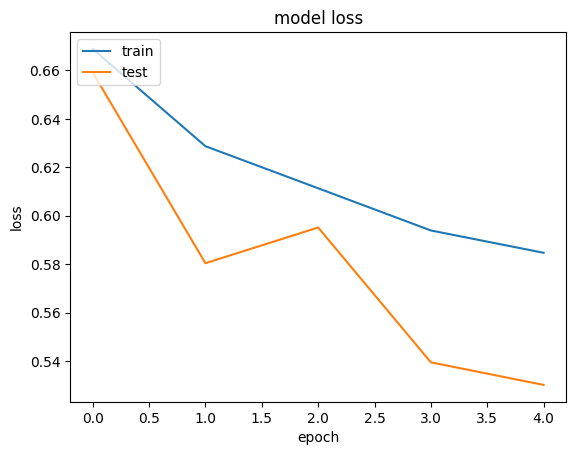

In [45]:
# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# CNN Model- 2

In [13]:
model2 = Sequential([
    Conv2D(10, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)),
    Dropout(0.05),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(10, kernel_size=(3, 3), activation='relu'),
    Conv2D(10, kernel_size=(3, 3), activation='relu'),
    Dropout(0.05),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(18, kernel_size=(4, 4), activation='relu'),
    Conv2D(18, kernel_size=(4, 4), activation='relu'),
    Dropout(0.05),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dropout(0.05),
    Dense(180, activation='relu'),
    Dropout(0.05),
    Dense(216, activation='relu'),
    Dropout(0.05),
    Dense(104, activation='relu'),
    Dropout(0.05),
    Dense(1, activation='sigmoid')])
model2.compile(optimizer=Adam(learning_rate = 0.0001),loss='binary_crossentropy',metrics=['accuracy'])

# Model summary
model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 222, 222, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 107, 107, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 107, 107, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 50, 50, 18)          │           2,898 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 47, 47, 18)          │           5,202 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 47, 47, 18)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 23, 23, 18)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 9522)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 9522)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 180)                 │       1,714,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 180)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 216)                 │          39,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 216)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 104)                 │          22,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 104)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             105 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,786,109 (6.81 MB)

 Trainable params: 1,786,109 (6.81 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history=model2.fit( train_generator,
                    validation_data = validation_generator,
                    epochs=10
                  )

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1712s 9s/step - accuracy: 0.5181 - loss: 0.6947 - val_accuracy: 0.5139 - val_loss: 0.6835
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 434s 2s/step - accuracy: 0.5781 - loss: 0.6784 - val_accuracy: 0.6456 - val_loss: 0.6285
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 432s 2s/step - accuracy: 0.6138 - loss: 0.6512 - val_accuracy: 0.6794 - val_loss: 0.6049
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 418s 2s/step - accuracy: 0.6426 - loss: 0.6337 - val_accuracy: 0.6872 - val_loss: 0.5900
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 405s 2s/step - accuracy: 0.6575 - loss: 0.6193 - val_accuracy: 0.7278 - val_loss: 0.5429
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 422s 2s/step - accuracy: 0.6718 - loss: 0.6066 - val_accuracy: 0.7322 - val_loss: 0.5490
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 383s 2s/step - accuracy: 0.6734 - loss: 0.6015 - val_accuracy: 0.7344 - val_loss: 0.5365
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 382s 2s/step - accuracy: 0.6802 - loss: 0.5909 - val_acc

In [18]:
print("Final Training Accuracy:", history.history['accuracy'][-1])
print("Final Validation Accuracy:", history.history['val_accuracy'][-1])

Final Training Accuracy: 0.7076666951179504
Final Validation Accuracy: 0.7438889145851135


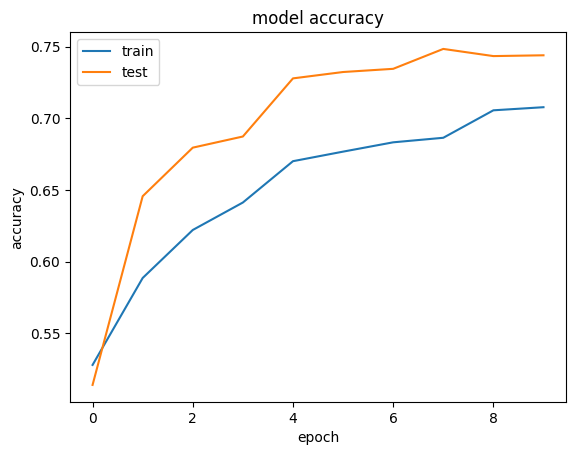

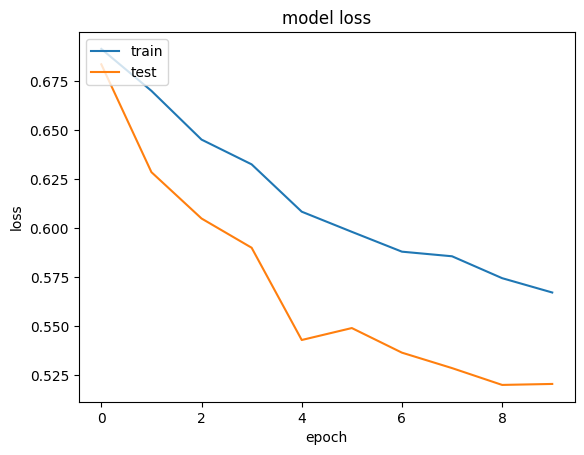

In [17]:
# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()